# Baloto

Diseñar un método basado en machine learning para tratar de predecir los resultados del Baloto es un ejercicio interesante desde un punto de vista académico y práctico. Aunque las probabilidades de ganar el premio mayor son extremadamente bajas, podemos explorar diferentes enfoques y ver qué tan bien funcionan.

Aquí hay un posible enfoque que podríamos seguir:

1. Recopilar datos históricos: Obtendremos los resultados de los sorteos anteriores del Baloto, incluyendo los números ganadores principales y la balota adicional. Cuantos más datos tengamos, mejor podremos entrenar nuestro modelo.

2. Preprocesamiento de datos: Los datos históricos podrían requerir algún preprocesamiento, como el manejo de valores faltantes o la normalización de los valores numéricos.

3. Selección de características: Aquí es donde podemos aplicar nuestra creatividad. Podríamos considerar características como la frecuencia de aparición de cada número, la suma de los números ganadores, la diferencia entre los números consecutivos, las combinaciones de números "fríos" y "calientes", entre otras.

4. Dividir los datos: Dividiremos nuestros datos en conjuntos de entrenamiento y prueba. El conjunto de entrenamiento se utilizará para entrenar el modelo, mientras que el conjunto de prueba se utilizará para evaluar su rendimiento.

5. Selección del modelo: Exploraremos diferentes algoritmos de machine learning, como redes neuronales, árboles de decisión, bosques aleatorios, etc. Cada algoritmo tiene sus propias fortalezas y debilidades, por lo que es recomendable probar varios.

6. Entrenamiento del modelo: Entrenaremos nuestro modelo utilizando el conjunto de datos de entrenamiento y las características seleccionadas.

7. Evaluación del modelo: Utilizaremos el conjunto de datos de prueba para evaluar el rendimiento de nuestro modelo. Podemos calcular métricas como la precisión, el recall y la puntuación F1 para medir qué tan bien está funcionando.

8. Ajuste de hiperparámetros: Si el rendimiento del modelo no es satisfactorio, podemos ajustar los hiperparámetros del algoritmo o probar diferentes combinaciones de características para mejorar los resultados.

9. Predicción: Una vez que tengamos un modelo entrenado y evaluado, podemos utilizarlo para hacer predicciones sobre los próximos sorteos del Baloto.

Es importante tener en cuenta que, aunque el machine learning puede encontrar patrones interesantes en los datos históricos, no hay garantía de que estos patrones se mantengan en el futuro debido a la naturaleza aleatoria del juego. Sin embargo, este ejercicio puede ser valioso para comprender mejor los conceptos de machine learning y explorar sus capacidades y limitaciones.

## **1. Recopilar datos históricos**

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import sqlite3
import pyarrow

In [2]:
connection = sqlite3.connect('my_database.db')
cursor = connection.cursor()

In [3]:
#Pendiente de optimizar
# Función que corrije el mes de la fecha
def correccion_fecha(fecha_sorteo):
    if fecha_sorteo.split('de')[1] == ' Enero ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'January' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Febrero ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'February' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Marzo ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'March' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Abril ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'April' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Mayo ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'May' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Junio ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'June' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Julio ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'July' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Agosto ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'August' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Septiembre ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'September' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Octubre ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'October' + fecha_sorteo.split('de')[2]
    elif fecha_sorteo.split('de')[1] == ' Noviembre ':
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'November' + fecha_sorteo.split('de')[2]
    else:
        fecha_sorteo = fecha_sorteo.split('de')[0] + 'December' + fecha_sorteo.split('de')[2]
    
    return fecha_sorteo

In [4]:
# El primer sorteo con este formato fue el 2081
def historico_revancha(numero_sorteo):
    # URL de la página que deseas escrapear
    url = f"https://baloto.com/resultados-revancha/{numero_sorteo}"

    # Realiza una solicitud GET a la página
    response = requests.get(url)

    # Comprueba que la solicitud fue exitosa
    if response.status_code == 200:
        # Parsea el contenido HTML de la página
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extrae la fecha del sorteo
        #fecha_sorteo = soup.find('div', string='Sábado').find_next_sibling('div').string.strip() #gotham-medium dark-blue
        fecha_sorteo = soup.find('div', class_='gotham-medium dark-blue').string.strip()
        fecha_sorteo = correccion_fecha(fecha_sorteo)

        # Extrae los números ganadores
        numeros_ganadores = soup.find('div', class_='container-balls-results').text.strip() #container-balls-results
        balota1 = int(soup.find('div', class_='yellow-ball').text.strip())
        balota2 = int(numeros_ganadores.split('\n')[7].strip())
        balota3 = int(numeros_ganadores.split('\n')[14].strip())
        balota4 = int(numeros_ganadores.split('\n')[21].strip())
        balota5 = int(numeros_ganadores.split('\n')[28].strip())
        balota6 = int(soup.find('div', class_='red-ball').text.strip())

    else:
        print(f"Error al acceder a la página: {response.status_code}")
    return balota1, balota2, balota3, balota4, balota5, balota6, fecha_sorteo

In [5]:
# El primer sorteo con este formato fue el 2081
def historico_baloto(numero_sorteo):
    # URL de la página que deseas escrapear
    url = f"https://baloto.com/resultados-baloto/{numero_sorteo}"

    # Realiza una solicitud GET a la página
    response = requests.get(url)

    # Comprueba que la solicitud fue exitosa
    if response.status_code == 200:
        # Parsea el contenido HTML de la página
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Extrae la fecha del sorteo
        #fecha_sorteo = soup.find('div', string='Sábado').find_next_sibling('div').string.strip() #gotham-medium dark-blue
        fecha_sorteo = soup.find('div', class_='gotham-medium dark-blue').string.strip()
        fecha_sorteo = correccion_fecha(fecha_sorteo)

        # Extrae los números ganadores
        numeros_ganadores = soup.find('div', class_='container-balls-results').text.strip() #container-balls-results
        balota1 = int(soup.find('div', class_='yellow-ball').text.strip())
        balota2 = int(numeros_ganadores.split('\n')[7].strip())
        balota3 = int(numeros_ganadores.split('\n')[14].strip())
        balota4 = int(numeros_ganadores.split('\n')[21].strip())
        balota5 = int(numeros_ganadores.split('\n')[28].strip())
        balota6 = int(soup.find('div', class_='red-ball').text.strip())

    else:
        print(f"Error al acceder a la página: {response.status_code}")
    return balota1, balota2, balota3, balota4, balota5, balota6, fecha_sorteo

In [6]:
for i in range(2081, 2406):
    df_resultados_baloto_revancha = pd.DataFrame({historico_revancha(i)})
    df_resultados_baloto_revancha.rename(columns={0:'B1', 1:'B2', 2:'B3', 3:'B4', 4:'B5', 5:'SB', 6:'fecha_sorteo'}, inplace=True)
    df_resultados_baloto_revancha['fecha_sorteo'] = pd.to_datetime(df_resultados_baloto_revancha['fecha_sorteo'], format="%d %B %Y", dayfirst=True)
    df_resultados_baloto_revancha['tipo_sorteo'] = 'revancha'
    df_resultados_baloto_revancha['numero_sorteo'] = i
    df_resultados_baloto_revancha.to_sql('historico_baloto_revancha', connection, if_exists='append', index=False)
    del df_resultados_baloto_revancha

    df_resultados_baloto_revancha = pd.DataFrame({historico_baloto(i)})
    df_resultados_baloto_revancha.rename(columns={0:'B1', 1:'B2', 2:'B3', 3:'B4', 4:'B5', 5:'SB', 6:'fecha_sorteo'}, inplace=True)
    df_resultados_baloto_revancha['fecha_sorteo'] = pd.to_datetime(df_resultados_baloto_revancha['fecha_sorteo'], format="%d %B %Y", dayfirst=True)
    df_resultados_baloto_revancha['tipo_sorteo'] = 'baloto'
    df_resultados_baloto_revancha['numero_sorteo'] = i
    df_resultados_baloto_revancha.to_sql('historico_baloto_revancha', connection, if_exists='append', index=False)
    del df_resultados_baloto_revancha

In [7]:
#connection.execute('drop table if exists historico_baloto_revancha')

In [8]:
data = pd.read_sql('SELECT * FROM historico_baloto_revancha', connection)
data

,B1,B2,B3,B4,B5,SB,fecha_sorteo,tipo_sorteo,numero_sorteo
0,1,16,34,41,43,2,2021-05-01 00:00:00,revancha,2081
1,22,23,27,28,30,3,2021-05-01 00:00:00,baloto,2081
2,3,15,17,29,32,16,2021-05-05 00:00:00,revancha,2082
3,2,5,10,23,34,7,2021-05-05 00:00:00,baloto,2082
4,5,10,24,29,41,11,2021-05-08 00:00:00,revancha,2083
...,...,...,...,...,...,...,...,...,...
645,16,22,26,27,37,9,2024-06-01 00:00:00,baloto,2403
646,8,18,20,28,41,4,2024-06-05 00:00:00,revancha,2404
647,3,19,24,38,39,5,2024-06-05 00:00:00,baloto,2404
648,7,25,28,39,41,7,2024-06-08 00:00:00,revancha,2405


In [9]:
data[data['tipo_sorteo'] == 'revancha'].to_parquet('historico_revancha.gzip', index=False, compression='gzip')
data[data['tipo_sorteo'] == 'revancha'].to_csv('historico_revancha.csv', index=False)

In [10]:
data[data['tipo_sorteo'] != 'revancha'].to_parquet('historico_baloto.gzip', index=False, compression='gzip')
data[data['tipo_sorteo'] != 'revancha'].to_csv('historico_baloto.csv', index=False)

In [11]:
data.to_parquet('historico_baloto_revancha.gzip', index=False, compression='gzip')
data.to_csv('historico_baloto_revancha.csv', index=False)

## EDA

Entendido, con los datos históricos de los resultados del Baloto, podemos explorar diferentes características para entrenar nuestro modelo de machine learning. Aquí hay algunas ideas de características que podríamos considerar:

1. **Frecuencia de aparición de cada número**:
   - Podemos contar la cantidad de veces que cada número del 1 al 43 (balotas principales) y del 1 al 16 (balota adicional) ha salido en los sorteos históricos.
   - Esta característica podría ayudarnos a identificar patrones de números "calientes" (que salen con frecuencia) y "fríos" (que no han salido en mucho tiempo).

2. **Suma de los números ganadores**:
   - Calcular la suma de los 5 números principales y la balota adicional para cada sorteo.
   - Esta característica podría revelar patrones relacionados con la magnitud de los números ganadores.

3. **Diferencia entre números consecutivos**:
   - Calcular la diferencia entre cada par de números principales consecutivos (por ejemplo, B2 - B1, B3 - B2, B4 - B3, B5 - B4).
   - Esta característica podría ayudarnos a identificar patrones en la distribución de los números ganadores.

4. **Combinaciones de números "fríos" y "calientes"**:
   - Definir umbrales para determinar si un número es "frío" o "caliente" basado en su frecuencia de aparición.
   - Contar la cantidad de números "fríos" y "calientes" en cada sorteo.
   - Esta característica podría revelar patrones relacionados con la combinación de números que han salido recientemente y los que no han salido en mucho tiempo.

5. **Diferencia con el sorteo anterior**:
   - Calcular la diferencia entre los números ganadores de un sorteo y los del sorteo anterior.
   - Esta característica podría ayudarnos a identificar patrones de continuidad o cambio en los números ganadores.

6. **Números repetidos**:
   - Contar la cantidad de números que se repiten en cada sorteo (tanto en los números principales como en la balota adicional).
   - Esta característica podría revelar patrones relacionados con la repetición de números en los sorteos.

7. **Características temporales**:
   - Incluir información sobre el día de la semana, el mes o la época del año en la que se realiza el sorteo.
   - Estas características podrían ayudarnos a identificar patrones estacionales o relacionados con días específicos.

Estas son solo algunas ideas de características que podríamos explorar. Además, podrías combinar estas características de diferentes maneras o crear nuevas características más complejas. La selección y combinación adecuada de características será crucial para que el modelo de machine learning pueda encontrar patrones útiles en los datos.

In [1]:
import pandas as pd
import numpy as np
import duckdb as db
import pyarrow
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from collections import defaultdict

In [26]:
pd.set_option('display.max_columns', None)

In [3]:
df_baloto_revancha = pd.read_parquet('historico_baloto_revancha.gzip')
df_baloto_revancha['fecha_sorteo'] = pd.to_datetime(df_baloto_revancha['fecha_sorteo'])
df_baloto_revancha['dia_semana'] = df_baloto_revancha['fecha_sorteo'].dt.day_name()
df_baloto_revancha['mes'] = df_baloto_revancha['fecha_sorteo'].dt.month
df_baloto_revancha['trimestre'] = df_baloto_revancha['fecha_sorteo'].apply(lambda x: (x.month%12 + 3)//3)

df_baloto_revancha

,B1,B2,B3,B4,B5,SB,fecha_sorteo,tipo_sorteo,numero_sorteo,dia_semana,mes,trimestre
0,1,16,34,41,43,2,2021-05-01,revancha,2081,Saturday,5,2
1,22,23,27,28,30,3,2021-05-01,baloto,2081,Saturday,5,2
2,3,15,17,29,32,16,2021-05-05,revancha,2082,Wednesday,5,2
3,2,5,10,23,34,7,2021-05-05,baloto,2082,Wednesday,5,2
4,5,10,24,29,41,11,2021-05-08,revancha,2083,Saturday,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
645,16,22,26,27,37,9,2024-06-01,baloto,2403,Saturday,6,3
646,8,18,20,28,41,4,2024-06-05,revancha,2404,Wednesday,6,3
647,3,19,24,38,39,5,2024-06-05,baloto,2404,Wednesday,6,3
648,7,25,28,39,41,7,2024-06-08,revancha,2405,Saturday,6,3


Como sabemos de entrada que no hay valores nulos nos saltaremos esa parte

In [5]:
df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'].describe().round(0)

,B1,B2,B3,B4,B5,SB,fecha_sorteo,numero_sorteo,mes,trimestre
count,325.0,325.0,325.0,325.0,325.0,325.0,325,325.0,325.0,325.0
mean,8.0,14.0,22.0,30.0,37.0,8.0,2022-11-19 05:58:53.538461440,2243.0,6.0,2.0
min,1.0,2.0,5.0,9.0,19.0,1.0,2021-05-01 00:00:00,2081.0,1.0,1.0
25%,3.0,9.0,16.0,25.0,33.0,4.0,2022-02-09 00:00:00,2162.0,4.0,2.0
50%,6.0,14.0,22.0,30.0,38.0,8.0,2022-11-19 00:00:00,2243.0,6.0,2.0
75%,12.0,20.0,28.0,35.0,42.0,12.0,2023-08-30 00:00:00,2324.0,9.0,3.0
max,26.0,35.0,40.0,42.0,43.0,16.0,2024-06-08 00:00:00,2405.0,12.0,4.0
std,6.0,7.0,8.0,7.0,6.0,5.0,NaN,94.0,3.0,1.0


In [6]:
#['B1','B2','B3','B4','B5','SB']
fig = px.histogram(df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'], x='fecha_sorteo', y='B1', nbins=325)
fig.show()

In [7]:
fig = px.histogram(df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'], x='fecha_sorteo', y='B2', nbins=325)
fig.show()

In [8]:
df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'].corr(numeric_only=True)

,B1,B2,B3,B4,B5,SB,numero_sorteo,mes,trimestre
B1,1.000000,0.671141,0.513054,0.353378,0.242549,-0.010050,0.009471,-0.026138,0.022301
B2,0.671141,1.000000,0.711634,0.502518,0.280995,0.040826,0.058402,-0.091889,-0.011859
B3,0.513054,0.711634,1.000000,0.682247,0.416339,-0.011836,0.068201,-0.102911,-0.060649
B4,0.353378,0.502518,0.682247,1.000000,0.634785,-0.025783,-0.003279,-0.085468,-0.037373
B5,0.242549,0.280995,0.416339,0.634785,1.000000,-0.078167,-0.023752,-0.112962,-0.020865
SB,-0.010050,0.040826,-0.011836,-0.025783,-0.078167,1.000000,-0.051704,0.056226,0.006336
numero_sorteo,0.009471,0.058402,0.068201,-0.003279,-0.023752,-0.051704,1.000000,-0.122414,-0.153253
mes,-0.026138,-0.091889,-0.102911,-0.085468,-0.112962,0.056226,-0.122414,1.000000,0.568861
trimestre,0.022301,-0.011859,-0.060649,-0.037373,-0.020865,0.006336,-0.153253,0.568861,1.000000


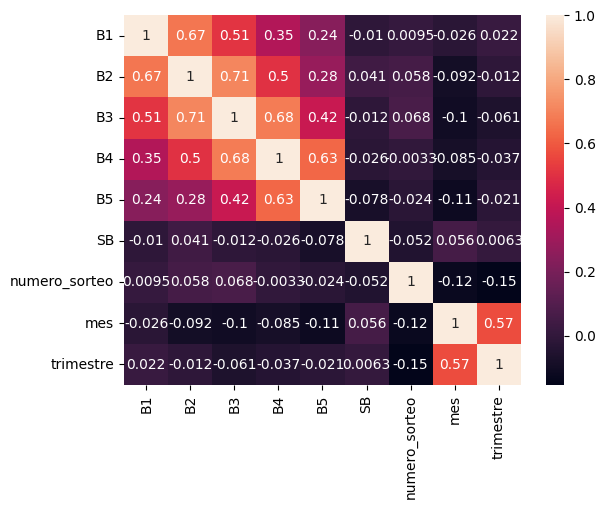

In [9]:
sns.heatmap(df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'].corr(numeric_only=True), annot=True);

In [12]:
# Inicializar los contadores de frecuencia
frecuencia_balotas = defaultdict(int)
frecuencia_adicional = defaultdict(int)

# Contar la frecuencia de aparición de las balotas principales y la balota adicional
for _, row in df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'].iterrows():
    for i in range(1, 6):
        balota = row[f'B{i}']
        frecuencia_balotas[balota] += 1

    balota_adicional = row['SB']
    frecuencia_adicional[balota_adicional] += 1

In [13]:
# Mostrar los resultados
print("Frecuencia de balotas principales del 1 al 43:")
for num in range(1, 44):
    print(f"Balota {num}: {frecuencia_balotas[num]} veces")

Frecuencia de balotas principales del 1 al 43:
Balota 1: 39 veces
Balota 2: 40 veces
Balota 3: 33 veces
Balota 4: 34 veces
Balota 5: 45 veces
Balota 6: 30 veces
Balota 7: 36 veces
Balota 8: 42 veces
Balota 9: 44 veces
Balota 10: 26 veces
Balota 11: 39 veces
Balota 12: 36 veces
Balota 13: 32 veces
Balota 14: 46 veces
Balota 15: 41 veces
Balota 16: 36 veces
Balota 17: 27 veces
Balota 18: 34 veces
Balota 19: 38 veces
Balota 20: 46 veces
Balota 21: 38 veces
Balota 22: 43 veces
Balota 23: 35 veces
Balota 24: 37 veces
Balota 25: 47 veces
Balota 26: 37 veces
Balota 27: 45 veces
Balota 28: 34 veces
Balota 29: 35 veces
Balota 30: 42 veces
Balota 31: 38 veces
Balota 32: 38 veces
Balota 33: 38 veces
Balota 34: 34 veces
Balota 35: 41 veces
Balota 36: 35 veces
Balota 37: 36 veces
Balota 38: 34 veces
Balota 39: 40 veces
Balota 40: 34 veces
Balota 41: 34 veces
Balota 42: 45 veces
Balota 43: 41 veces


In [53]:
# Frecuencia de balotas por día de la semana
frecuencia_dia_semana = df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'].groupby('dia_semana').apply(lambda x: x[['B1', 'B2', 'B3', 'B4', 'B5']].stack().value_counts()).unstack().fillna(0)

# Frecuencia de balotas por mes
frecuencia_mes = df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'].groupby('mes').apply(lambda x: x[['B1', 'B2', 'B3', 'B4', 'B5']].stack().value_counts()).unstack().fillna(0)

# Frecuencia de balotas por estación del año
frecuencia_epoca = df_baloto_revancha[df_baloto_revancha['tipo_sorteo'] == 'baloto'].groupby('trimestre').apply(lambda x: x[['B1', 'B2', 'B3', 'B4', 'B5']].stack().value_counts()).unstack().fillna(0)


C:\Users\sebas\AppData\Local\Temp\ipykernel_16248\2178174066.py:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\sebas\AppData\Local\Temp\ipykernel_16248\2178174066.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.

C:\Users\sebas\AppData\Local\Temp\ipykernel_16248\2178174066.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a f

In [81]:
frecuencia_dia_semana.T[['Wednesday']].sort_values(by=['Wednesday'], ascending=False)
#frecuencia_dia_semana.T[['Saturday']].sort_values(by=['Saturday'], ascending=False)

dia_semana,Wednesday
20,26
15,25
14,24
31,24
43,23
42,23
25,23
16,23
36,22
26,22


In [55]:
frecuencia_mes.T[[6]].sort_values(by=[6], ascending=False)

mes,6
9,8.0
1,6.0
39,6.0
16,6.0
43,6.0
22,5.0
32,5.0
30,5.0
24,5.0
14,5.0


In [58]:
frecuencia_epoca.T[[2]].sort_values(by=[2], ascending=False)

trimestre,2
4,16
23,15
27,15
5,14
25,14
40,14
30,13
20,13
26,12
37,12


In [86]:
db.sql('''select SB, count(SB), dia_semana
       from df_baloto_revancha
       where tipo_sorteo = 'baloto'
       group by SB, dia_semana
       having dia_semana = 'Wednesday'
       order by count(SB) DESC;''')

┌───────┬───────────┬────────────┐
│  SB   │ count(SB) │ dia_semana │
│ int64 │   int64   │  varchar   │
├───────┼───────────┼────────────┤
│    11 │        16 │ Wednesday  │
│    13 │        14 │ Wednesday  │
│    14 │        13 │ Wednesday  │
│     2 │        12 │ Wednesday  │
│     7 │        12 │ Wednesday  │
│     6 │        12 │ Wednesday  │
│    16 │        11 │ Wednesday  │
│     1 │        10 │ Wednesday  │
│     3 │        10 │ Wednesday  │
│    12 │        10 │ Wednesday  │
│     8 │         9 │ Wednesday  │
│     4 │         9 │ Wednesday  │
│     9 │         7 │ Wednesday  │
│     5 │         6 │ Wednesday  │
│    10 │         6 │ Wednesday  │
│    15 │         5 │ Wednesday  │
├───────┴───────────┴────────────┤
│ 16 rows              3 columns │
└────────────────────────────────┘

In [85]:
db.sql('''select SB, count(SB), mes
       from df_baloto_revancha
       where tipo_sorteo = 'baloto'
       group by SB, mes
       having mes = 6
       order by count(SB) DESC;''')

┌───────┬───────────┬───────┐
│  SB   │ count(SB) │  mes  │
│ int64 │   int64   │ int32 │
├───────┼───────────┼───────┤
│    10 │         5 │     6 │
│     4 │         5 │     6 │
│     7 │         3 │     6 │
│    11 │         3 │     6 │
│     1 │         2 │     6 │
│    13 │         2 │     6 │
│    14 │         2 │     6 │
│     5 │         2 │     6 │
│     9 │         2 │     6 │
│     8 │         1 │     6 │
│     2 │         1 │     6 │
│    16 │         1 │     6 │
├───────┴───────────┴───────┤
│ 12 rows         3 columns │
└───────────────────────────┘

In [84]:
db.sql('''select SB, count(SB), trimestre
       from df_baloto_revancha
       where tipo_sorteo = 'baloto'
       group by SB, trimestre
       having trimestre = 2
       order by count(SB) DESC;''')

┌───────┬───────────┬───────────┐
│  SB   │ count(SB) │ trimestre │
│ int64 │   int64   │   int64   │
├───────┼───────────┼───────────┤
│    14 │         9 │         2 │
│     7 │         9 │         2 │
│     8 │         8 │         2 │
│    11 │         7 │         2 │
│     6 │         7 │         2 │
│     3 │         7 │         2 │
│     2 │         7 │         2 │
│     4 │         6 │         2 │
│    15 │         5 │         2 │
│    12 │         5 │         2 │
│     5 │         5 │         2 │
│    16 │         5 │         2 │
│     9 │         3 │         2 │
│    13 │         2 │         2 │
│     1 │         2 │         2 │
│    10 │         1 │         2 │
├───────┴───────────┴───────────┤
│ 16 rows             3 columns │
└───────────────────────────────┘

In [92]:
#8.0	14.0	22.0	30.0	37.0	8.0
db.sql('''select B1, B2, B3, B4, B5, SB from 
       df_baloto_revancha 
       where B1=8 and B2=14 and B3=22 and B4=30 and B5=37 and SB=8;''')

┌───────┬───────┬───────┬───────┬───────┬───────┐
│  B1   │  B2   │  B3   │  B4   │  B5   │  SB   │
│ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │
├───────────────────────────────────────────────┤
│                    0 rows                     │
└───────────────────────────────────────────────┘

In [90]:
db.sql('''select B1, B2, B3, B4, B5, SB from 
       df_baloto_revancha 
       where B1=5 or B2=14 or B3=16 or B4=27 or B5=31 or SB=14;''')

┌───────┬───────┬───────┬───────┬───────┬───────┐
│  B1   │  B2   │  B3   │  B4   │  B5   │  SB   │
│ int64 │ int64 │ int64 │ int64 │ int64 │ int64 │
├───────┼───────┼───────┼───────┼───────┼───────┤
│     5 │    10 │    24 │    29 │    41 │    11 │
│     5 │    16 │    31 │    32 │    33 │    14 │
│     5 │     8 │    14 │    26 │    33 │     3 │
│     5 │    17 │    21 │    26 │    31 │     7 │
│     5 │     9 │    16 │    29 │    42 │    11 │
│     5 │    20 │    22 │    32 │    35 │    16 │
│     5 │    15 │    27 │    34 │    35 │     4 │
│     5 │     7 │    23 │    34 │    43 │    11 │
│     5 │    20 │    35 │    38 │    43 │     2 │
│     5 │    11 │    29 │    30 │    43 │    14 │
│     · │     · │     · │     · │     · │     · │
│     · │     · │     · │     · │     · │     · │
│     · │     · │     · │     · │     · │     · │
│     3 │    13 │    20 │    30 │    35 │    14 │
│     2 │    27 │    30 │    34 │    37 │    14 │
│    16 │    25 │    26 │    35 │    39 │    14 │
